# Machine Learning Classifier

## import libraries

In [69]:
# !pip install pandas
import pandas as pd
import json
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import sem

In [93]:
# !pip install graphviz
import graphviz 
from IPython.display import SVG
from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut

## read CSVs to dataframes

In [22]:
# news_media_basic_data

combined_analysis_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/combined_analysis_data.csv')
combined_analysis_data

user_id                  user_name  user_followers_count  \
0   4.283330e+05          CNN Breaking News            63662926.0   
1   6.124730e+05              BBC News (UK)            14276300.0   
2   7.421430e+05           BBC News (World)            37774379.0   
3   7.592510e+05                        CNN            59357266.0   
4   7.885240e+05              Guardian news             3802981.0   
5   8.070950e+05         The New York Times            53885565.0   
6   1.367531e+06                   Fox News            22228143.0   
7   1.652541e+06                    Reuters            25471928.0   
8   1.917731e+06                   The Hill             4436643.0   
9   2.467791e+06        The Washington Post            19648090.0   
10  2.836421e+06                      MSNBC             4814934.0   
11  2.884771e+06                   Newsweek             3572805.0   
12  3.108351e+06    The Wall Street Journal            20084774.0   
13  5.392522e+06                        NPR             8983290.0   
14  5.402612e+06          BBC Breaking News            50727938.0   
15  5.741722e+06               NPR Politics             3063376.0   
16  5.988062e+06              The Economist            26869991.0   
17  7.587032e+06                   Sky News             7955300.0   
18  7.998482e+06         USA TODAY Politics              225721.0   
19  9.300262e+06                   POLITICO             4667612.0   
20  1.077465e+07                   TheBlaze              793465.0   
21  1.185603e+07               NBC Politics              666839.0   
22  1.385042e+07               CNN Politics             4439094.0   
23  1.417332e+07                   NBC News             9212344.0   
24  1.429331e+07                       TIME            19226664.0   
25  1.443406e+07               NYT Politics              524759.0   
26  1.451195e+07                   HuffPost            11358112.0   
27  1.466235e+07       The Washington Times              428947.0   
28  1.467792e+07             The New Yorker             9069623.0   
29  1.501249e+07                   CBS News             8719635.0   
30  1.516456e+07                      Slate             1759759.0   
31  1.545869e+07          HuffPost Politics             1439771.0   
32  1.575428e+07                  USA TODAY             4823489.0   
33  1.601278e+07            The Daily Beast             1389316.0   
34  1.603292e+07          Fox News Politics             1830566.0   
35  1.681564e+07          ABC News Politics             1079807.0   
36  1.693529e+07             Democracy Now!              807400.0   
37  1.851086e+07               Mother Jones              861988.0   
38  1.876770e+07          CBS News Politics              313486.0   
39  1.895607e+07        Washington Examiner              309186.0   
40  2.878549e+07                   ABC News            17644680.0   
41  2.909782e+07            The Epoch Times              486052.0   
42  3.235329e+07           The Economist US              139065.0   
43  3.471336e+07                  Bloomberg             8533888.0   
44  3.577304e+07               The Atlantic             2156682.0   
45  4.763640e+07          Guardian politics              256191.0   
46  6.932953e+07          BBC North America              312777.0   
47  8.781841e+07               The Guardian            10646480.0   
48  9.147862e+07                     Forbes            18202881.0   
49  1.409285e+08          POLITICO New York               39701.0   
50  2.705084e+08              CBS News Poll               13369.0   
51  3.802854e+08              Daily Mail US              416368.0   
52  3.844381e+08              ABC News Live               96020.0   
53  5.641116e+08         Bloomberg Politics              361262.0   
54  1.408004e+09             The Federalist              344587.0   
55  2.329067e+09              The Intercept              866020.0   
56  2.347049e+09                        Vox             1046634.0   
57  4.0

In [23]:
combined_analysis_data.describe()

user_id  user_followers_count  user_following_count  \
count  5.900000e+01          5.900000e+01             59.000000   
mean   1.998462e+16          9.783685e+06           3856.135593   
std    1.535048e+17          1.529765e+07          14899.722714   
min    4.283330e+05          8.158000e+03              3.000000   
25%    5.572167e+06          5.054055e+05            261.000000   
50%    1.501249e+07          3.063376e+06            722.000000   
75%    3.524320e+07          1.100230e+07           1328.000000   
max    1.179092e+18          6.366293e+07          94642.000000   

       count_total_tweet_id  count_total_tweet_created_at_date  count_reply  \
count             59.000000                          59.000000    59.000000   
mean            2647.966102                          40.372881    77.728814   
std             1882.029269                          12.223350   122.314297   
min               33.000000                           3.000000     0.000000   
25%              876.500000                          35.000000     3.500000   
50%             2717.000000                          46.000000    27.000000   
75%             4136.000000                          49.000000    97.000000   
max             6213.000000                          49.000000   558.000000   

       count_retweet  count_tweet  avg_tweet_scores  count_abortion_tweet  \
count      59.000000    59.000000         59.000000             59.000000   
mean      216.610169  2353.627119         -0.061654             69.338983   
std       320.622671  1777.971664          0.085536             48.692069   
min         0.000000     2.000000         -0.241345              0.000000   
25%        25.500000   711.500000         -0.110137             34.000000   
50%       106.000000  2134.000000         -0.059116             59.000000   
75%       259.000000  3797.000000         -0.004428             92.500000   
max      1793.000000  5977.000000          0.123502            181.000000   

       ...  avg_daily_total_tweet  avg_daily_tweet  avg_daily_retweet  \
count  ...              59.000000        59.000000          59.000000   
mean   ...              80.792542        73.146780           5.685932   
std    ...              89.709087        86.546649           9.200516   
min    ...               1.740000         0.070000           0.000000   
25%    ...              20.490000        16.285000           0.710000   
50%    ...              55.450000        43.550000           3.240000   
75%    ...             101.995000        87.140000           6.060000   
max    ...             420.500000       409.640000          51.230000   

       avg_daily_reply  perc_of_abortion_tweet  perc_of_gun_control_tweet  \
count        59.000000               59.000000                  59.000000   
mean          1.960847                0.043220                   0.087458   
std           2.987993                0.033448                   0.386218   
min           0.000000                0.000000                   0.000000   
25%           0.100000                0.020000                   0.025000   
50%           0.950000                0.030000                   0.040000   
75%           2.060000                0.070000                   0.050000   
max          13.290000                0.150000                   3.000000   

       perc_of_gay_marriage_keyword_percentage  perc_of_climate_change_tweet  \
count                                59.000000                     59.000000   
mean                                  0.002034                      0.054915   
std                                   0.004464                      0.021040   
min                                   0.000000                      0.000000   
25%                                   0.000000                      0.040000   
50%                                   0.000000                      0.050000   
75%                                   0.000000                      0.065000   
max       

In [24]:
combined_analysis_data.shape

(59, 36)

In [25]:
combined_analysis_data.isnull().sum()

user_id                                    0
user_name                                  0
user_followers_count                       0
user_following_count                       0
news_media                                 0
us_or_foreign                              0
general_or_political                       0
political_spectrum                         0
count_total_tweet_id                       0
count_total_tweet_created_at_date          0
count_reply                                0
count_retweet                              0
count_tweet                                0
avg_tweet_scores                           0
count_abortion_tweet                       0
avg_abortion_tweet_scores                  0
count_gun_control_tweet                    0
avg_gun_control_tweet_scores               0
count_gay_marriage_tweet                   0
avg_gay_marriage_tweet_scores              0
count_climate_change_tweet                 0
avg_climate_change_tweet_scores            0
count_gend

In [26]:
combined_analysis_data['is_us_media'] = np.where(combined_analysis_data['us_or_foreign']== 'US', 1, 0)

In [27]:
combined_analysis_data['is_political_account'] = np.where(combined_analysis_data['general_or_political']== 'Political', 1, 0)

In [28]:
combined_analysis_data.head()

user_id          user_name  user_followers_count  user_following_count  \
0  428333.0  CNN Breaking News            63662926.0                 121.0   
1  612473.0      BBC News (UK)            14276300.0                  93.0   
2  742143.0   BBC News (World)            37774379.0                  18.0   
3  759251.0                CNN            59357266.0                1103.0   
4  788524.0      Guardian news             3802981.0                1225.0   

     news_media us_or_foreign general_or_political political_spectrum  \
0           CNN            US              General               Left   
1      BBC News       Foreign              General             Middle   
2      BBC News       Foreign              General             Middle   
3           CNN            US              General               Left   
4  The Guardian       Foreign              General               Left   

   count_total_tweet_id  count_total_tweet_created_at_date  ...  \
0                   249                                 48  ...   
1                  3798                                 49  ...   
2                  2094                                 49  ...   
3                  3898                                 49  ...   
4                  4144                                 35  ...   

   avg_daily_retweet  avg_daily_reply  perc_of_abortion_tweet  \
0               0.23             0.02                    0.03   
1               7.67             0.04                    0.00   
2               2.16             0.04                    0.01   
3               0.51             0.37                    0.03   
4               0.00             0.00                    0.01   

   perc_of_gun_control_tweet  perc_of_gay_marriage_keyword_percentage  \
0                       0.05                                      0.0   
1                       0.01                                      0.0   
2                       0.02                                      0.0   
3                       0.04                                      0.0   
4                       0.01                                      0.0   

   perc_of_climate_change_tweet  perc_of_gender_identity_tweet  \
0                          0.05                           0.00   
1                          0.03                           0.01   
2                          0.04                           0.01   
3                          0.06                           0.02   
4                          0.05                           0.01   

   perc_of_inflation_keyword_tweet  is_us_media  is_political_account  
0                             0.03            1                     0  
1                             0.03            0                     0  
2                             0.01            0                     0  
3                             0.02            1                     0  
4                             0.03            0                     0  

[5 rows x 38 columns]

## classifiers

### decision tree

In [32]:
x = combined_analysis_data[[
    'user_followers_count',
    'user_following_count',
    'is_us_media',
    'is_political_account',
    'avg_tweet_scores',
    'avg_abortion_tweet_scores',
    'avg_gun_control_tweet_scores',
    'avg_gay_marriage_tweet_scores',
    'avg_climate_change_tweet_scores',
    'avg_gender_identity_tweet_scores',
    'avg_inflation_tweet_scores',
    'avg_daily_total_tweet',
    'avg_daily_tweet',
    'avg_daily_retweet',
    'avg_daily_reply',
    'perc_of_abortion_tweet',
    'perc_of_gun_control_tweet',
    'perc_of_gay_marriage_keyword_percentage',
    'perc_of_climate_change_tweet',
    'perc_of_gender_identity_tweet',
    'perc_of_inflation_keyword_tweet'    
]]
y = combined_analysis_data['political_spectrum']

In [33]:
features = x.columns.tolist()
target = combined_analysis_data['political_spectrum'].values

In [34]:
len(features)

21

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [94]:
loocv = LeaveOneOut()

In [115]:
# train a decision tree
dtree = tree.DecisionTreeClassifier(criterion="gini")
dtree = dtree.fit(x_train, y_train)

In [142]:
dtree_scores = cross_val_score(dtree, x, y, scoring='accuracy', cv=loocv, n_jobs=-1)
dtree_scores

array([0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1.])

In [144]:
print('Accuracy: %.3f (%.3f)' % (mean(dtree_scores), std(dtree_scores)))

Accuracy: 0.559 (0.496)


In [118]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,24), dpi=800)
tree.plot_tree(dtree,
              feature_names = features,
              class_names=target,
              filled = True)

[Text(0.6666666666666666, 0.9375, 'avg_gay_marriage_tweet_scores <= 0.485\ngini = 0.546\nsamples = 47\nvalue = [29, 9, 9]\nclass = Left'),
 Text(0.5, 0.8125, 'avg_daily_retweet <= 15.36\ngini = 0.473\nsamples = 42\nvalue = [29, 5, 8]\nclass = Left'),
 Text(0.4166666666666667, 0.6875, 'avg_gay_marriage_tweet_scores <= 0.153\ngini = 0.429\nsamples = 40\nvalue = [29, 3, 8]\nclass = Left'),
 Text(0.3333333333333333, 0.5625, 'avg_climate_change_tweet_scores <= -0.206\ngini = 0.559\nsamples = 26\nvalue = [15, 3, 8]\nclass = Left'),
 Text(0.25, 0.4375, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Middle'),
 Text(0.4166666666666667, 0.4375, 'avg_daily_retweet <= 3.615\ngini = 0.51\nsamples = 23\nvalue = [15, 3, 5]\nclass = Left'),
 Text(0.25, 0.3125, 'user_followers_count <= 48565822.0\ngini = 0.231\nsamples = 15\nvalue = [13, 0, 2]\nclass = Left'),
 Text(0.16666666666666666, 0.1875, 'avg_daily_tweet <= 261.28\ngini = 0.133\nsamples = 14\nvalue = [13, 0, 1]\nclass = Left'),
 Text(0.083

In [ ]:
# evaluate features

In [125]:
# Extracting the importances by sklearn 
importances_sk = dtree.feature_importances_

feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

print(f"Feature importance by sklearn: {feature_importance_sk}")

Feature importance by sklearn: {'user_followers_count': 0.063, 'user_following_count': 0.0, 'is_us_media': 0.0, 'is_political_account': 0.0, 'avg_tweet_scores': 0.0, 'avg_abortion_tweet_scores': 0.062, 'avg_gun_control_tweet_scores': 0.0, 'avg_gay_marriage_tweet_scores': 0.266, 'avg_climate_change_tweet_scores': 0.109, 'avg_gender_identity_tweet_scores': 0.0, 'avg_inflation_tweet_scores': 0.111, 'avg_daily_total_tweet': 0.0, 'avg_daily_tweet': 0.072, 'avg_daily_retweet': 0.223, 'avg_daily_reply': 0.0, 'perc_of_abortion_tweet': 0.0, 'perc_of_gun_control_tweet': 0.0, 'perc_of_gay_marriage_keyword_percentage': 0.0, 'perc_of_climate_change_tweet': 0.0, 'perc_of_gender_identity_tweet': 0.0, 'perc_of_inflation_keyword_tweet': 0.094}


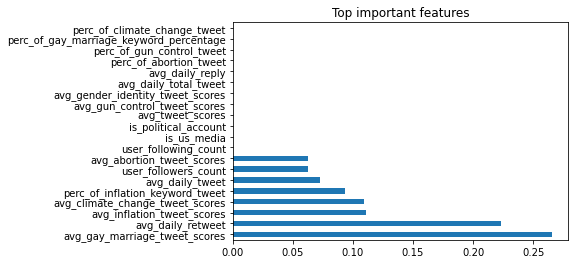

In [126]:
feat_importances = pd.Series(dtree.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top important features")
plt.show()

In [ ]:
# get best features

In [120]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=x_train, y=y_train)
best_dtree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.5533333333333335 {'max_depth': 5}


In [132]:
clf.score(x_train,y_train)

0.851063829787234

In [121]:
best_dtree_model.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [122]:
best_dtree_model_scores = cross_val_score(best_dtree_model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
best_dtree_model_scores

array([0.75      , 0.58333333, 0.66666667, 0.75      , 0.45454545,
       0.58333333, 0.5       , 0.58333333, 0.41666667, 0.45454545,
       0.58333333, 0.83333333, 0.41666667, 0.41666667, 0.54545455])

In [123]:
mean(best_dtree_model_scores)

0.5691919191919191

In [129]:
embeded_rf_selector = SelectFromModel(dtree, prefit=True)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = x.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features:', embeded_rf_feature)

8 selected features: ['user_followers_count', 'avg_abortion_tweet_scores', 'avg_gay_marriage_tweet_scores', 'avg_climate_change_tweet_scores', 'avg_inflation_tweet_scores', 'avg_daily_tweet', 'avg_daily_retweet', 'perc_of_inflation_keyword_tweet']


In [124]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,24), dpi=800)
tree.plot_tree(best_dtree_model,
              feature_names = features,
              class_names=target,
              filled = True)

[Text(0.6, 0.9166666666666666, 'avg_gay_marriage_tweet_scores <= 0.485\ngini = 0.546\nsamples = 47\nvalue = [29, 9, 9]\nclass = Left'),
 Text(0.4, 0.75, 'avg_daily_retweet <= 15.36\ngini = 0.473\nsamples = 42\nvalue = [29, 5, 8]\nclass = Left'),
 Text(0.3, 0.5833333333333334, 'avg_gay_marriage_tweet_scores <= 0.153\ngini = 0.429\nsamples = 40\nvalue = [29, 3, 8]\nclass = Left'),
 Text(0.2, 0.4166666666666667, 'avg_climate_change_tweet_scores <= -0.206\ngini = 0.559\nsamples = 26\nvalue = [15, 3, 8]\nclass = Left'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Middle'),
 Text(0.3, 0.25, 'avg_daily_retweet <= 3.615\ngini = 0.51\nsamples = 23\nvalue = [15, 3, 5]\nclass = Left'),
 Text(0.2, 0.08333333333333333, 'gini = 0.231\nsamples = 15\nvalue = [13, 0, 2]\nclass = Left'),
 Text(0.4, 0.08333333333333333, 'gini = 0.656\nsamples = 8\nvalue = [2, 3, 3]\nclass = Middle'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 14\nvalue = [14, 0, 0]\nclass = Left'),
 T

In [144]:
dtree.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

feat importance = [0.02836879 0.14658842 0.         0.         0.         0.06659201
 0.0212766  0.         0.         0.03404255 0.01870567 0.07997154
 0.05879271 0.         0.         0.03191489 0.         0.
 0.01985816 0.        ]


In [145]:
x.shape

(59, 20)

In [146]:
x_selected = combined_analysis_data[['user_followers_count', 
                                     'avg_abortion_tweet_scores', 
                                     'avg_gay_marriage_tweet_scores', 
                                     'avg_climate_change_tweet_scores', 
                                     'avg_inflation_tweet_scores', 
                                     'avg_daily_tweet', 
                                     'avg_daily_retweet', 
                                     'perc_of_inflation_keyword_tweet']]

In [147]:
selected_features = x_selected.columns.tolist()

In [149]:
x_selected_train, x_selected_test, y_train, y_test = train_test_split(x_selected, y, test_size = 0.2)

In [150]:
# train a decision tree
dtree_2 = tree.DecisionTreeClassifier(criterion="gini")
dtree_2 = dtree_2.fit(x_selected_train, y_train)

In [156]:
dtree_2_scores = cross_val_score(dtree_2, x_selected, y, scoring='accuracy', cv=loocv, n_jobs=-1)
dtree_2_scores

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1.])

In [157]:
print('Accuracy: %.3f (%.3f)' % (mean(dtree_2_scores), std(dtree_2_scores)))

Accuracy: 0.542 (0.498)


In [153]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,24), dpi=800)
tree.plot_tree(dtree_2,
              feature_names = selected_features,
              class_names=target,
              filled = True)

[Text(0.31666666666666665, 0.9444444444444444, 'user_following_count <= 99.0\ngini = 0.527\nsamples = 47\nvalue = [30, 9, 8]\nclass = Left'),
 Text(0.13333333333333333, 0.8333333333333334, 'tweet_ct_gun_control_keyword_percentage <= 0.045\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]\nclass = Middle'),
 Text(0.06666666666666667, 0.7222222222222222, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = Middle'),
 Text(0.2, 0.7222222222222222, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Middle'),
 Text(0.5, 0.8333333333333334, 'tweet_ct_climate_change_keyword_avg_scores_compound <= -0.22\ngini = 0.449\nsamples = 42\nvalue = [30, 6, 6]\nclass = Left'),
 Text(0.3333333333333333, 0.7222222222222222, 'average_tweet_per_day <= 21.235\ngini = 0.375\nsamples = 4\nvalue = [1, 0, 3]\nclass = Middle'),
 Text(0.26666666666666666, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Left'),
 Text(0.4, 0.6111111111111112, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass =

In [154]:
#Predict the response for test dataset
y_pred = dtree_2.predict(x_selected_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [ ]:
print(classification_report(y_test, y_pred))

### logistic regression

In [75]:
x = combined_analysis_data[[
    'user_followers_count',
    'user_following_count',
    'is_us_media',
    'is_political_account',
    'avg_tweet_scores',
    'avg_abortion_tweet_scores',
    'avg_gun_control_tweet_scores',
    'avg_gay_marriage_tweet_scores',
    'avg_climate_change_tweet_scores',
    'avg_gender_identity_tweet_scores',
    'avg_inflation_tweet_scores',
    'avg_daily_total_tweet',
    'avg_daily_tweet',
    'avg_daily_retweet',
    'avg_daily_reply',
    'perc_of_abortion_tweet',
    'perc_of_gun_control_tweet',
    'perc_of_gay_marriage_keyword_percentage',
    'perc_of_climate_change_tweet',
    'perc_of_gender_identity_tweet',
    'perc_of_inflation_keyword_tweet'    
]]
y = combined_analysis_data['political_spectrum']

In [82]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

In [83]:
x_train_std, x_test_std, y_train, y_test = train_test_split(x_std, y, test_size = 0.2)

In [162]:
# Perform GridSearchCV to tune best-fit LR model
param = {'C': [10**-2,10**-1,10**0,10**1,10**2]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear')
lr_gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
lr_gs_model.fit(x_train_std, y_train)

# Train a LR model with best parameters
model = LogisticRegression(**lr_gs_model.best_params_, penalty='l1', solver='liblinear')
model.fit(x_train_std, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [163]:
lr_gs_model_scores = cross_val_score(lr_gs_model, x, y, scoring='accuracy', cv=loocv, n_jobs=-1)
lr_gs_model_scores

/Users/katherina/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/katherina/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/katherina/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/katherina/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/katherina/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/katherina/opt/anaconda3/lib/python3.9/site-packages/s

/Users/katherina/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/katherina/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/katherina/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/katherina/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/katherina/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/katherina/opt/anaconda3/lib/python3.9/site-packages/s

array([1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1.])

In [164]:
print('Accuracy: %.3f (%.3f)' % (mean(lr_gs_model_scores), std(lr_gs_model_scores)))

Accuracy: 0.695 (0.460)


In [85]:
coef = model.coef_[0]
coef

array([-0.05830186, -0.66882914,  0.048619  ,  0.        ,  0.399243  ,
        0.71396022,  0.58413521,  0.07717432,  0.        , -0.29418937,
        0.        ,  0.        , -0.57694736,  0.23024862,  0.        ,
        0.        ,  0.        ,  0.81135472,  0.82775726, -0.47307894,
       -0.95756383])

In [88]:
imp_features = pd.Series(x.columns)[list(coef!=0)]
new_x_train = x_train[imp_features]
new_x_test = x_test[imp_features]

In [139]:
print("Redundent feature count:", sum(model.coef_[0]==0))
print("Redundent features:", list(pd.Series(x.columns)[list(coef==0)]))

Redundent feature count: 7
Redundent features: ['is_political_account', 'avg_climate_change_tweet_scores', 'avg_inflation_tweet_scores', 'avg_daily_total_tweet', 'avg_daily_reply', 'perc_of_abortion_tweet', 'perc_of_gun_control_tweet']


In [140]:
print("Selected feature count:", sum(model.coef_[0]!=0))
print("Selected features:", list(pd.Series(x.columns)[list(coef!=0)]))

Selected feature count: 14
Selected features: ['user_followers_count', 'user_following_count', 'is_us_media', 'avg_tweet_scores', 'avg_abortion_tweet_scores', 'avg_gun_control_tweet_scores', 'avg_gay_marriage_tweet_scores', 'avg_gender_identity_tweet_scores', 'avg_daily_tweet', 'avg_daily_retweet', 'perc_of_gay_marriage_keyword_percentage', 'perc_of_climate_change_tweet', 'perc_of_gender_identity_tweet', 'perc_of_inflation_keyword_tweet']


In [91]:
model.coef_

array([[-0.05830186, -0.66882914,  0.048619  ,  0.        ,  0.399243  ,
         0.71396022,  0.58413521,  0.07717432,  0.        , -0.29418937,
         0.        ,  0.        , -0.57694736,  0.23024862,  0.        ,
         0.        ,  0.        ,  0.81135472,  0.82775726, -0.47307894,
        -0.95756383],
       [ 0.42562614,  0.78802745, -0.16070706,  0.        ,  0.        ,
         0.        , -0.41565339,  0.        ,  0.        ,  1.06752689,
         0.01854894,  0.        ,  0.38022716, -0.6547957 ,  0.36611807,
        -0.33587271,  0.        , -0.3530148 ,  0.        ,  0.        ,
         0.34105817],
       [-0.20439899,  0.        ,  0.15462587,  0.        , -0.36423798,
        -1.12514131,  0.        , -0.28716224, -0.34666754, -0.25119359,
         0.        ,  0.45511309,  0.        ,  0.17485862, -0.19844043,
         0.        ,  0.        , -0.30614829, -0.63018931,  0.61023757,
         0.3500452 ]])

In [92]:
model.intercept_

array([ 0.84284888, -1.91494611, -2.28519928])

>1 mean=0.5106 se=0.051
>2 mean=0.4932 se=0.033
>3 mean=0.4869 se=0.024
>4 mean=0.4746 se=0.022
>5 mean=0.4652 se=0.021
>6 mean=0.4677 se=0.022
>7 mean=0.4686 se=0.020
>8 mean=0.4695 se=0.019
>9 mean=0.4699 se=0.018
>10 mean=0.4702 se=0.017
>11 mean=0.4716 se=0.017
>12 mean=0.4720 se=0.016
>13 mean=0.4711 se=0.015
>14 mean=0.4724 se=0.014
>15 mean=0.4749 se=0.014


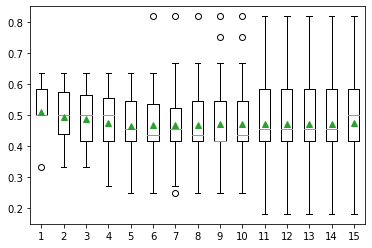

In [70]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=repeats, random_state=1)
    # create model
    model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(x, y, r)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    # store
    results.append(scores)
# plot the results
plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [42]:
rfe = RFE(model, 3)
fit = rfe.fit(x, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

TypeError: __init__() takes 2 positional arguments but 3 were given